Description
Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards

Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank
Data Dictionary:
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

 

Best Practices for Notebook : 

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

Perform an Exploratory Data Analysis on the data - (6 Marks)
- Univariate analysis 
- Bivariate analysis 
- Use appropriate visualizations to identify the patterns and insights 
- Any other exploratory deep dive 

In [3]:
#load the data file from local file and keep the original dataset and copy the data in to new dataframe
ccdata = pd.read_csv('BankChurners.csv')
df = ccdata.copy()

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

# Insights
    There are 22 columns, all the columns does not have null values as per non-nullcount,
    we have integer, float and object data types. 
    There is one unnamed:21, column without any values. 
    10127 entries in this dataset

In [7]:
df.shape

(10127, 22)

In [8]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
Unnamed: 21                     0
dtype: int64

# Observation
    1. Attrition_Flag, Gender, Marital_Status, Income_Category, Card_Category are categorial columns
    2. CLIENTNUM is the unique customer id, that can be dropped
    3. Unnamed: 21 can be dropped

In [9]:
pd.DataFrame(df.isnull().sum(), columns=['No of MissingValues'])

No of MissingValues
CLIENTNUM                                   0
Attrition_Flag                              0
Customer_Age                                0
Gender                                      0
Dependent_count                             0
Education_Level                             0
Marital_Status                              0
Income_Category                             0
Card_Category                               0
Months_on_book                              0
Total_Relationship_Count                    0
Months_Inactive_12_mon                      0
Contacts_Count_12_mon                       0
Credit_Limit                                0
Total_Revolving_Bal                         0
Avg_Open_To_Buy                             0
Total_Amt_Chng_Q4_Q1                        0
Total_Trans_Amt                             0
Total_Trans_Ct                              0
Total_Ct_Chng_Q4_Q1                         0
Avg_Utilization_Ratio                       0
Unnamed: 21                             10127

In [10]:
# Summary of dataset
df.describe().T

count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   
Unnamed: 21                   0.0           NaN           NaN          NaN   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   
Unnamed: 21                        NaN           NaN           NaN   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01  
Unnamed: 21                        NaN

In [115]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

# Data Preprocessing

In [93]:
# Making a list of all categorical variables
cat_col = [
    "Education_Level",
    "Marital_Status",
    "Attrition_Flag",
    "Income_Category",
    "Card_Category"
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 40)

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


In [4]:
# Convert Attrition_Flag 
attflag = {'Existing Customer':0,'Attrited Customer':1}
df['Attrition_Flag'] = df['Attrition_Flag'].map(attflag)

<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

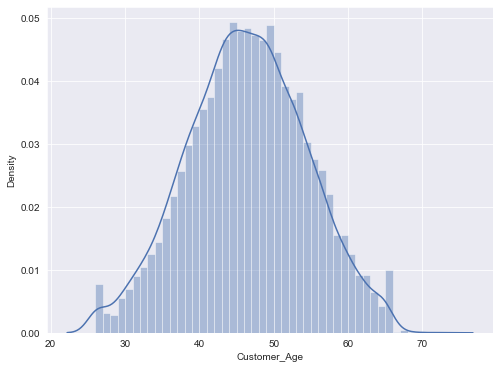

In [12]:
# Age univariate plot
sns.set({'figure.figsize':(8,6)})
sns.distplot(df['Customer_Age'], kde=True)

<AxesSubplot:xlabel='Months_on_book', ylabel='Density'>

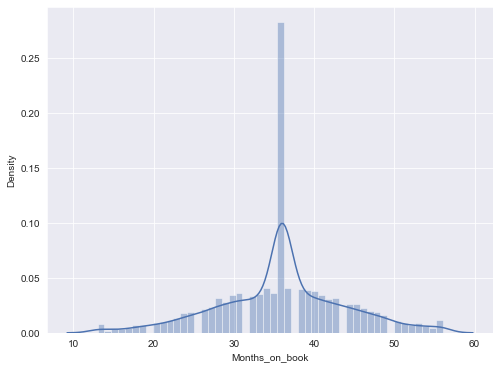

In [17]:
# Dependent_count univariate plot
sns.set({'figure.figsize':(8,6)})
sns.distplot(df['Months_on_book'], kde=True)

<AxesSubplot:xlabel='Gender', ylabel='count'>

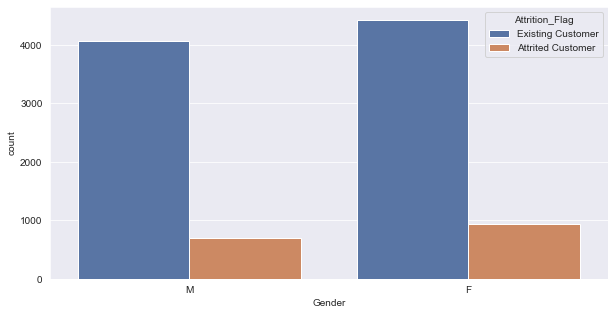

In [21]:
sns.countplot(x="Gender", data=df, hue='Attrition_Flag')

<AxesSubplot:xlabel='Dependent_count', ylabel='count'>

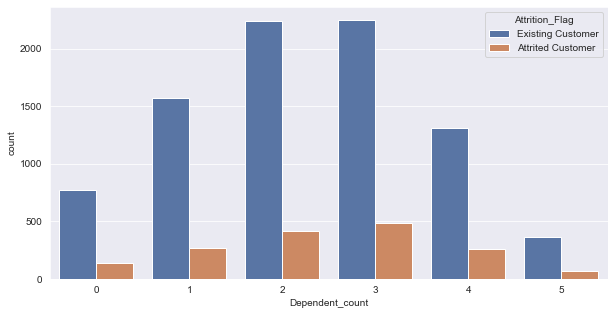

In [22]:
sns.countplot(x="Dependent_count", data=df, hue='Attrition_Flag')

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

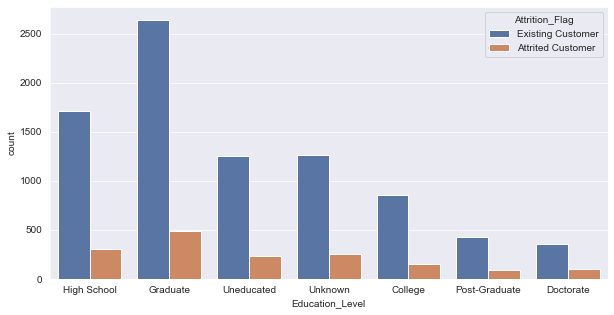

In [23]:
sns.countplot(x="Education_Level", data=df, hue='Attrition_Flag')

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

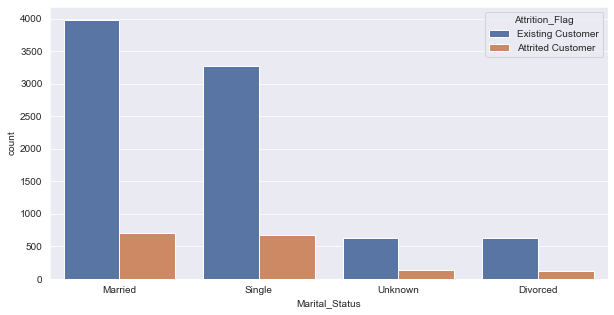

In [24]:
sns.countplot(x="Marital_Status", data=df, hue='Attrition_Flag')

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

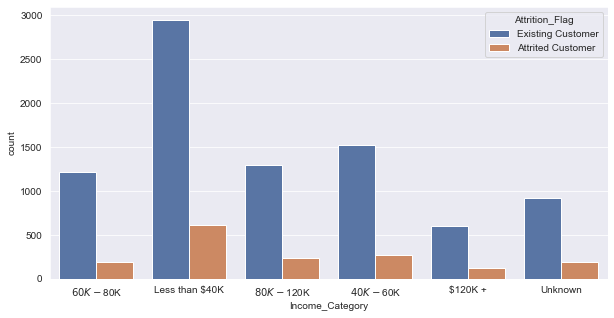

In [25]:
sns.countplot(x="Income_Category", data=df, hue='Attrition_Flag')

<AxesSubplot:xlabel='Card_Category', ylabel='count'>

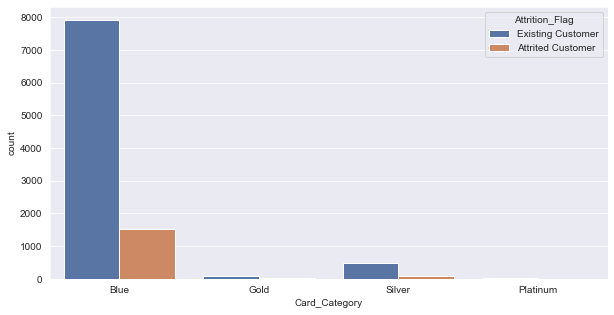

In [26]:
sns.countplot(x="Card_Category", data=df, hue='Attrition_Flag')

<AxesSubplot:xlabel='Months_on_book', ylabel='count'>

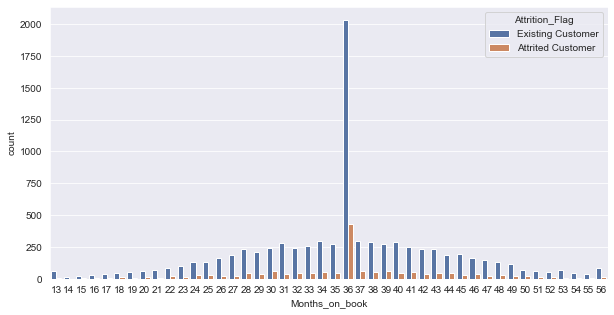

In [27]:
sns.countplot(x="Months_on_book", data=df, hue='Attrition_Flag')

<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='count'>

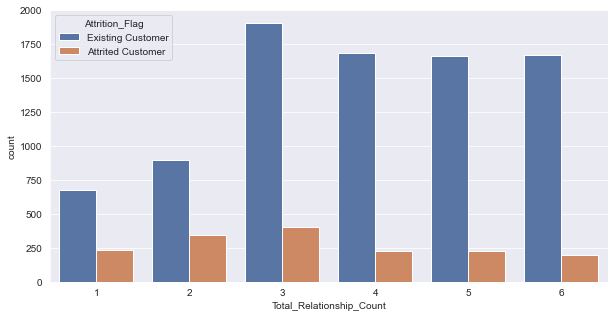

In [28]:
sns.countplot(x="Total_Relationship_Count", data=df, hue='Attrition_Flag')

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='count'>

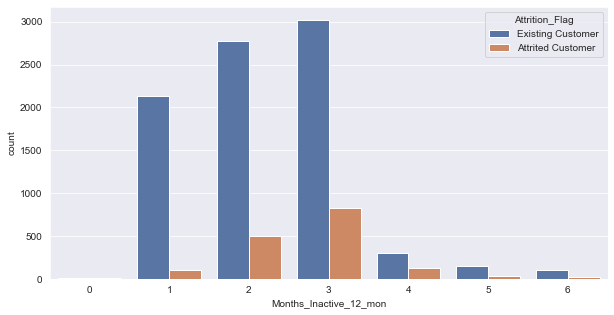

In [29]:
sns.countplot(x="Months_Inactive_12_mon", data=df, hue='Attrition_Flag')

<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='count'>

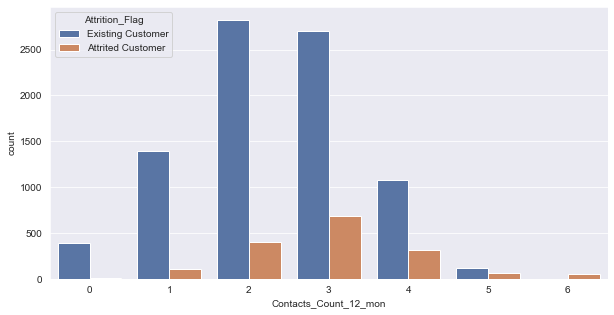

In [30]:
sns.countplot(x="Contacts_Count_12_mon", data=df, hue='Attrition_Flag')

In [33]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [34]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Unnamed: 21'],
      dtype='object')

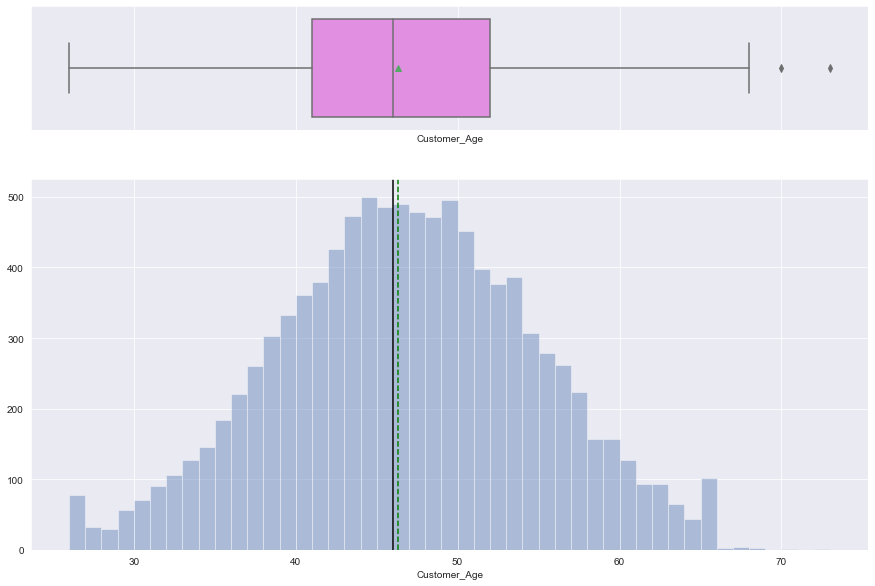

In [35]:
histogram_boxplot(df['Customer_Age'])

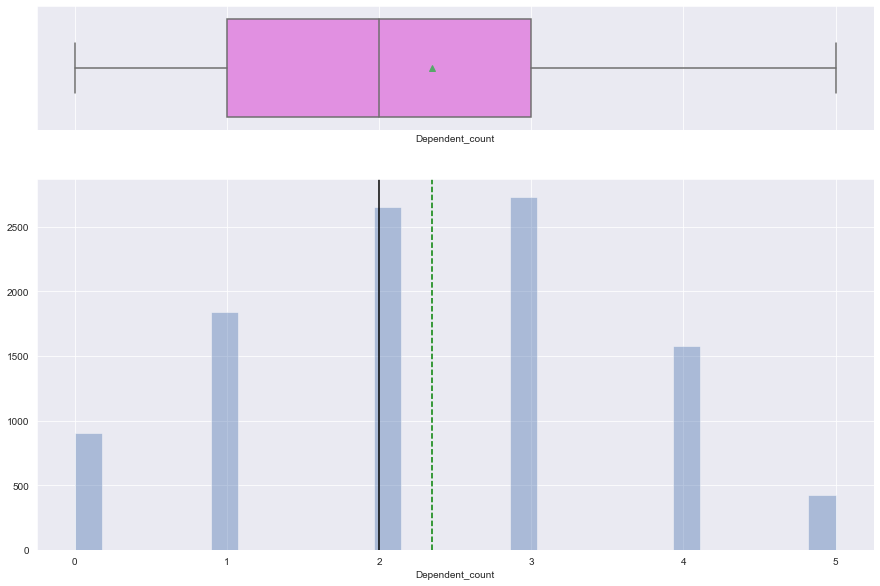

In [37]:
histogram_boxplot(df['Dependent_count'])

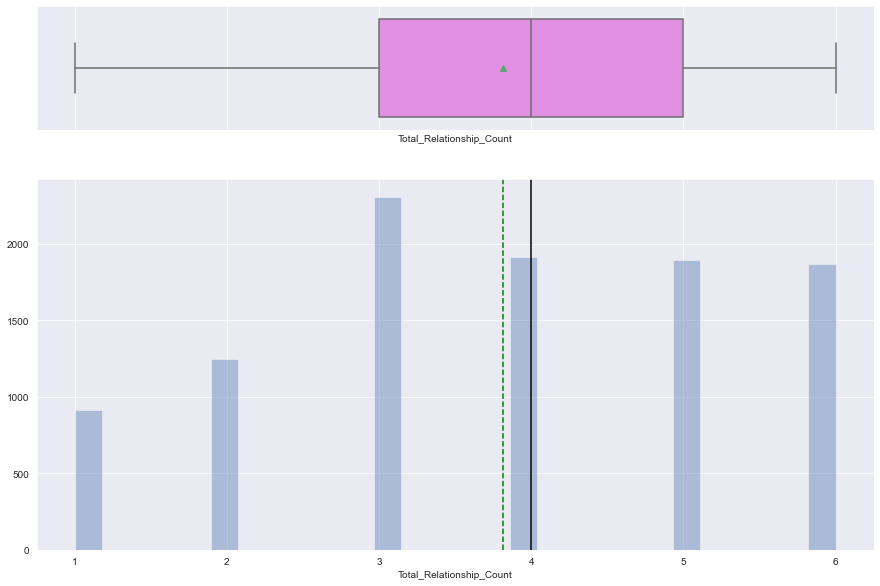

In [41]:
histogram_boxplot(df['Total_Relationship_Count'])

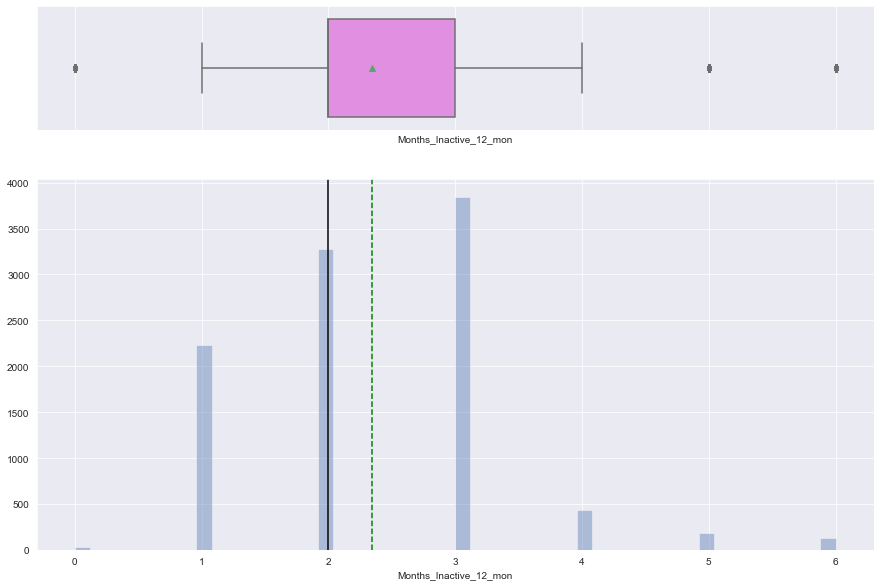

In [42]:
histogram_boxplot(df['Months_Inactive_12_mon'])

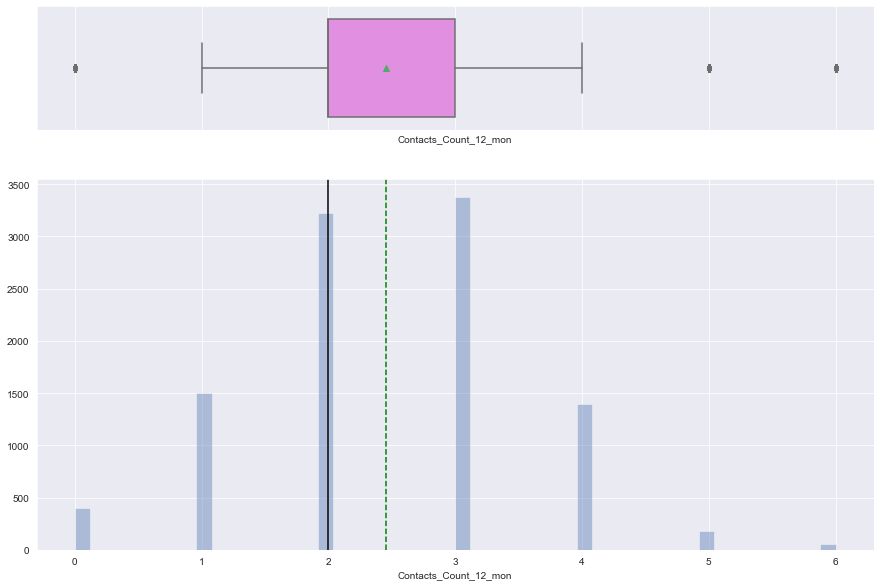

In [43]:
histogram_boxplot(df['Contacts_Count_12_mon'])

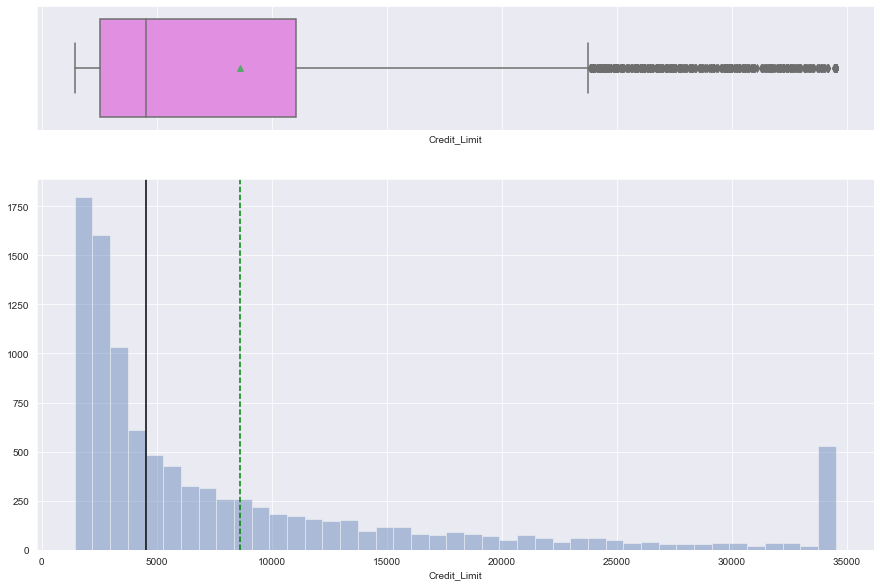

In [44]:
histogram_boxplot(df['Credit_Limit'])

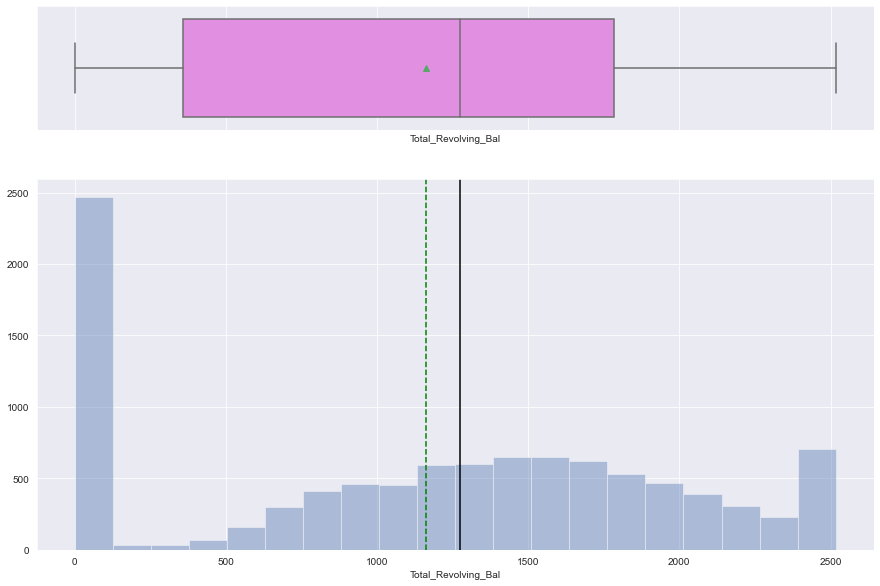

In [45]:
histogram_boxplot(df['Total_Revolving_Bal'])

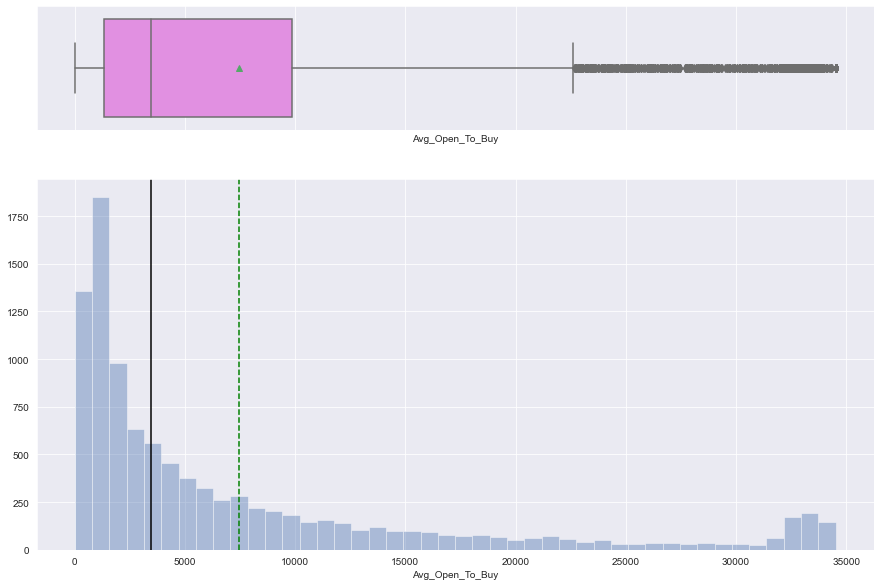

In [46]:
histogram_boxplot(df['Avg_Open_To_Buy'])

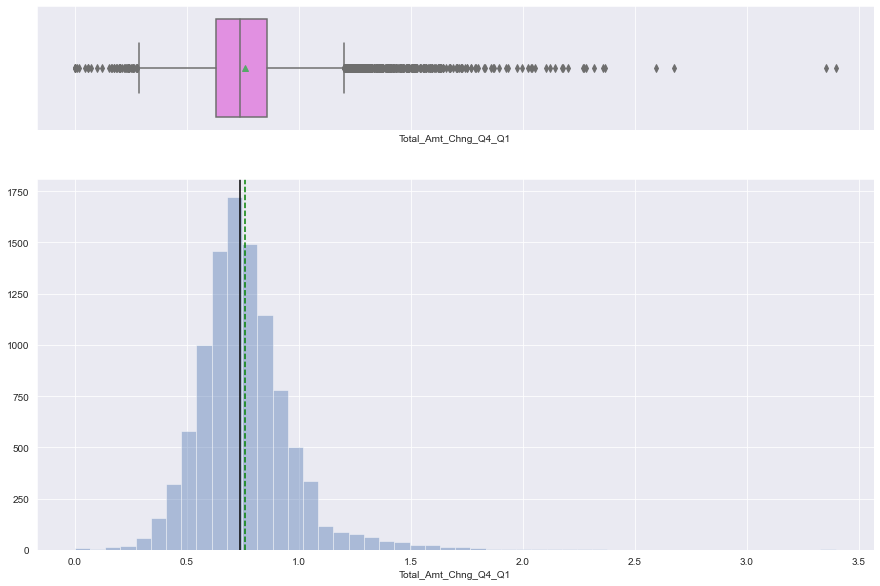

In [47]:
histogram_boxplot(df['Total_Amt_Chng_Q4_Q1'])

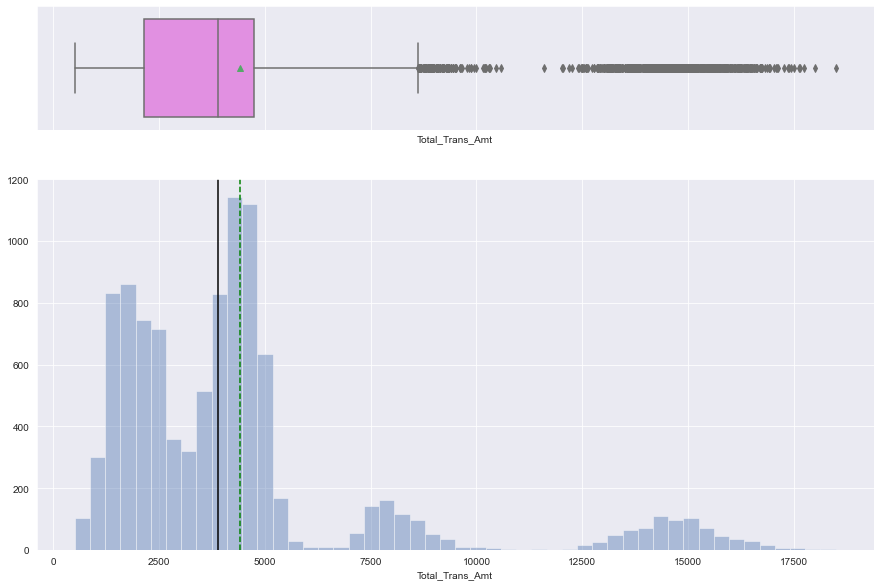

In [48]:
histogram_boxplot(df['Total_Trans_Amt'])

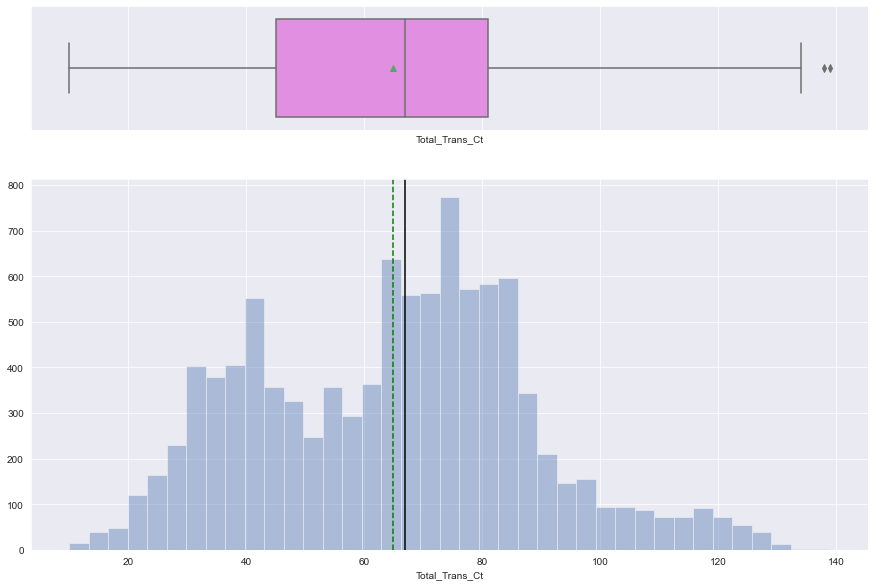

In [49]:
histogram_boxplot(df['Total_Trans_Ct'])

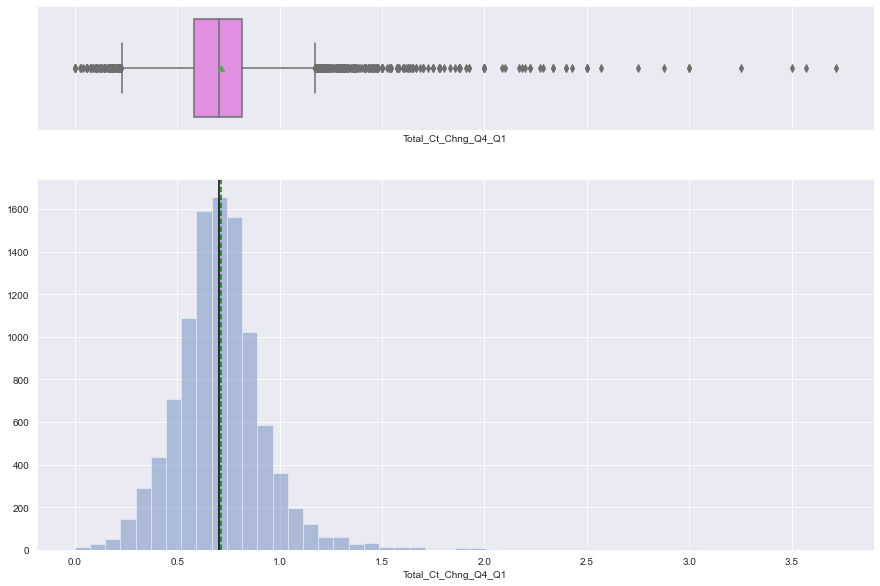

In [50]:
histogram_boxplot(df['Total_Ct_Chng_Q4_Q1'])

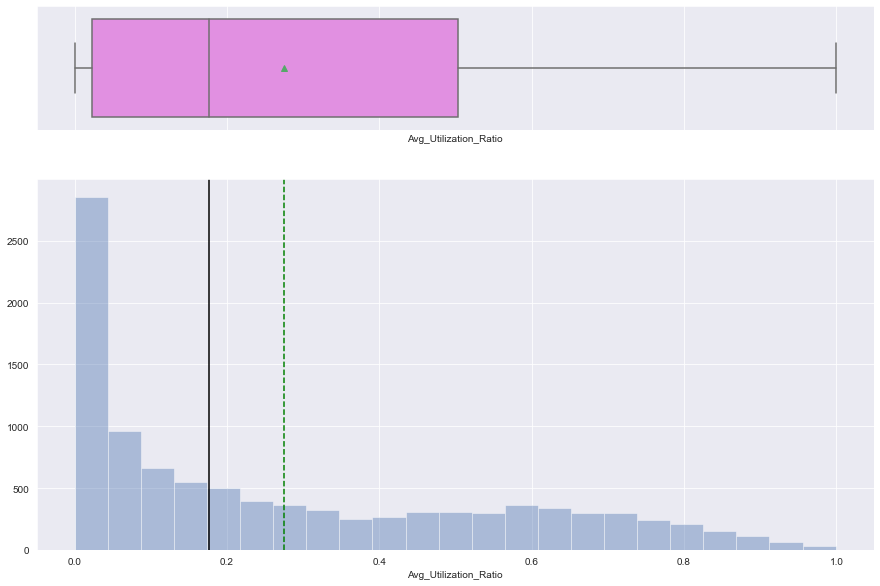

In [51]:
histogram_boxplot(df['Avg_Utilization_Ratio'])

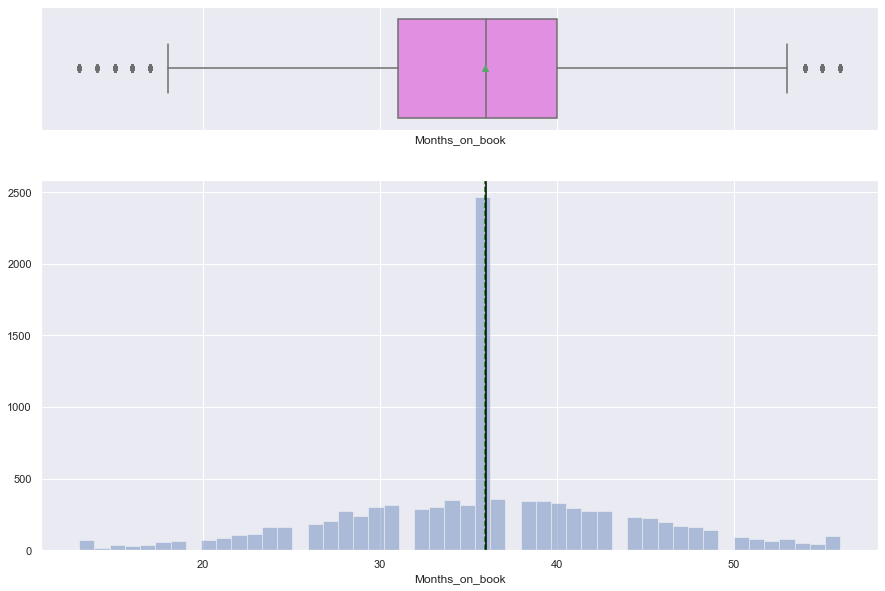

In [61]:
# observations on Months_on_book
histogram_boxplot(df['Months_on_book'])

In [159]:
def perc_on_bar(feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    # Creating a countplot for the feature
    sns.set(rc={"figure.figsize": (10, 5)})
    ax = sns.countplot(x=feature, data=df)

    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=14)  # annotate the percantage

    plt.show()  # show the plot

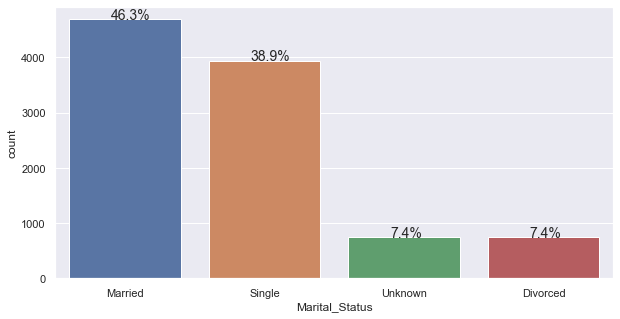

In [55]:
# observations on Marital_Status
perc_on_bar(df["Marital_Status"])

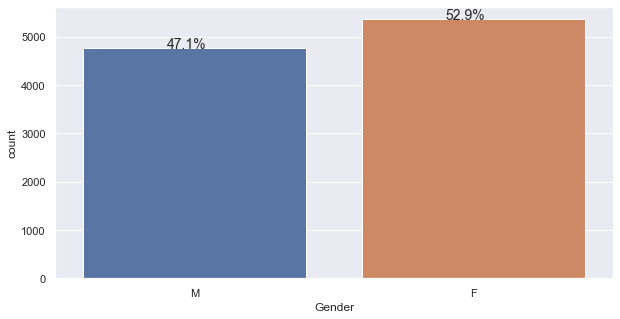

In [56]:
# observations on Gender
perc_on_bar(df["Gender"])

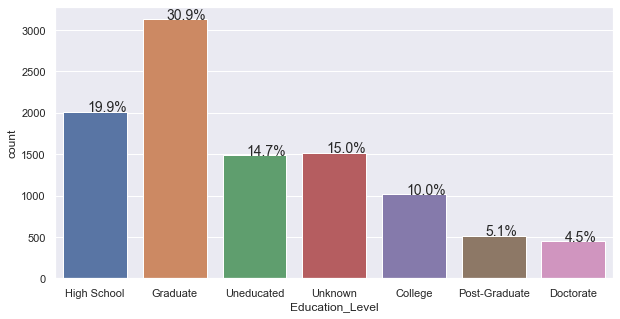

In [57]:
# observations on Education_Level
perc_on_bar(df["Education_Level"])

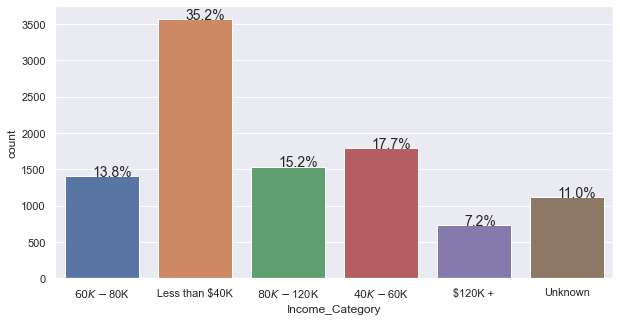

In [58]:
# observations on Income_Category
perc_on_bar(df["Income_Category"])

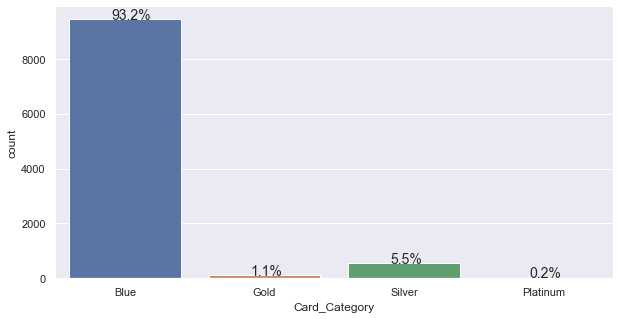

In [59]:
# observations on Card_Category
perc_on_bar(df["Card_Category"])

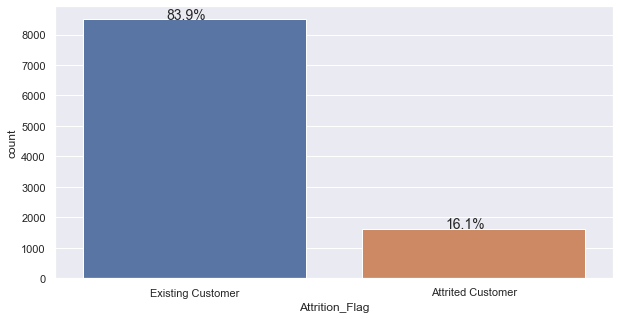

In [62]:
# observations on Attrition_Flag
perc_on_bar(df["Attrition_Flag"])

# Bivariate Analysis

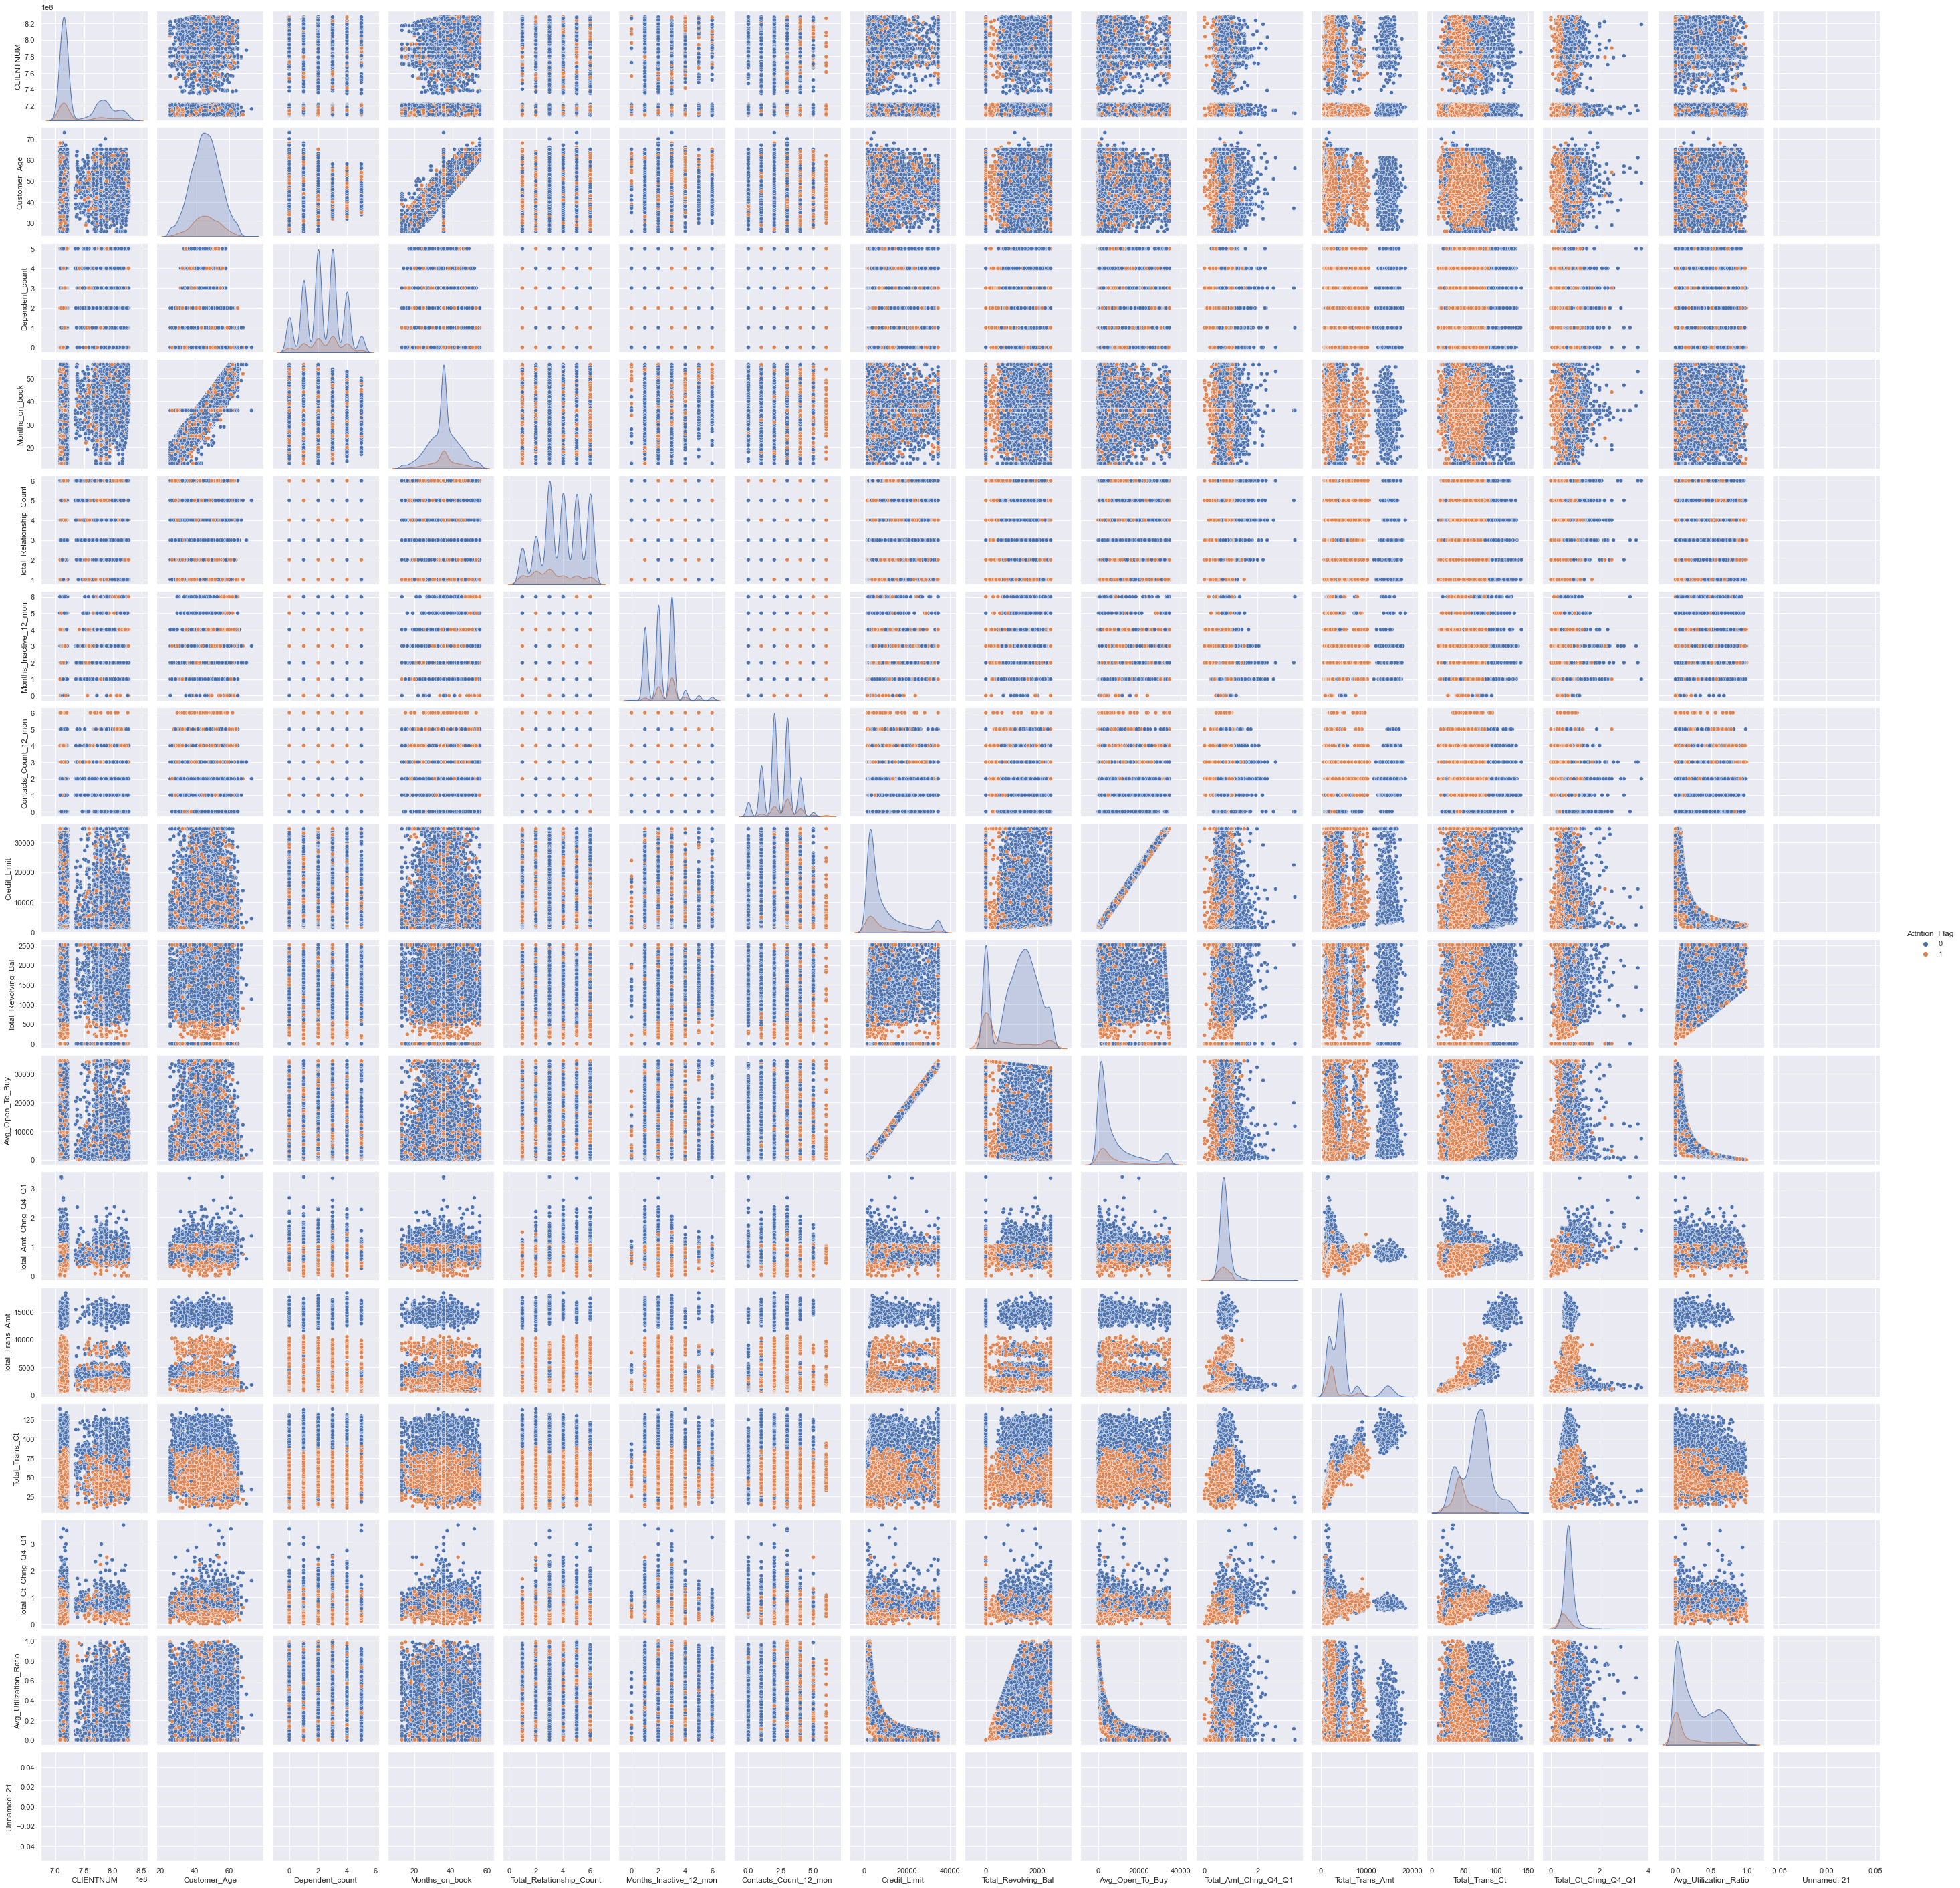

In [85]:
sns.set({'figure.figsize':(15,20)})
sns.pairplot(df, hue="Attrition_Flag")

In [78]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
Unnamed: 21                     0
dtype: int64

Illustrate the insights based on EDA - (5 Marks)
Key meaningful observations on the relationship between variables

# Data Preparation

    Data Pre-processing - (5 Marks)
            Prepare the data for analysis 
            - Missing value Treatment, 
            Outlier Detection(treat, if needed- why or why not Feature Engineering, 
            Prepare data for modeling

In [80]:
df.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
10122              40  ...                      3        4003.0   
10123              25  ...                      3        4277.0   
10124              36  ...                      4        5409.0   
10125              36  ...                      3        5281.0   
10126              25  ...                      4       10388.0   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
10122                 1851           2152.0                 0.703   
10123                 2186           2091.0                 0.804   
10124                    0           5409.0                 0.819   
10125                    0           5281.0                 0.535   
10126                 1961           8427.0                 0.703   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
10122            15476             117                0.857   
10123             8764              69                0.683   
10124            10291              60                0.818   
10125             8395              62                0.722   
10126            10294              61                0.649   

       Avg_Utilization_Ratio  Unnamed: 21  
10122                  0.462          NaN  
10123                  0.511          NaN  
10124                  0.000          NaN  
10125                  0.000          NaN  
10126                  0.189          NaN  

[5 rows x 22 columns]

In [81]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [86]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [87]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [110]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [111]:
df['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

# Data Preparation

In [5]:

# Convert Education
education = {'Unknown':-1,'Uneducated':1,'High School':2,'College':3,'Graduate':4,'Post-Graduate':5,'Doctorate':6}
df['Education_Level'] = df['Education_Level'].map(education)

# convert Marital_Status
ms = {'Unknown':-1,'Single':1,'Married':2, 'Divorced':3}
df['Marital_Status'] = df['Marital_Status'].map(ms)

# convert income 
income = {'Unknown':-1,'Less than $40K':1,'$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'$120K +':5}
df['Income_Category'] = df['Income_Category'].map(income)

In [6]:
# drop columns
df.drop(columns=['Unnamed: 21','CLIENTNUM'],inplace=True)

# Split the data in to train and test set

In [7]:
# Separating target variable and other variables
X = df.drop(columns="Attrition_Flag")
Y = df["Attrition_Flag"]

In [8]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


# Missing Value treatment

In [9]:
# treat all the unknown (converted to -1) values using imputer and stretegy median
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=-1, strategy="median")
cols=['Marital_Status','Income_Category','Education_Level']
imputer = rep_0.fit(df[cols])
df[cols] = imputer.transform(df[cols])

In [10]:
df.describe().transpose()

count         mean          std     min       25%  \
Attrition_Flag            10127.0     0.160660     0.367235     0.0     0.000   
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Education_Level           10127.0     3.051940     1.302722     1.0     2.000   
Marital_Status            10127.0     1.684507     0.603090     1.0     1.000   
Income_Category           10127.0     2.305322     1.284294     1.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Attrition_Flag               0.000      0.000      1.000  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Education_Level              3.000      4.000      6.000  
Marital_Status               2.000      2.000      3.000  
Income_Category              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

# Encoding categorial variables

In [11]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 21) (3039, 21)


# Model building - Logistic Regression - (6 Marks)
    - Make a logistic regression model 
    - Improve model performance by up and downsampling the data 
    - Regularize above models, if required

In [12]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [13]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
# Make a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

0.8914116485686081


In [15]:
test_pred = model.predict(X_test)

print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2551
           1       0.80      0.43      0.56       488

    accuracy                           0.89      3039
   macro avg       0.85      0.70      0.75      3039
weighted avg       0.88      0.89      0.88      3039

[[2500   51]
 [ 279  209]]


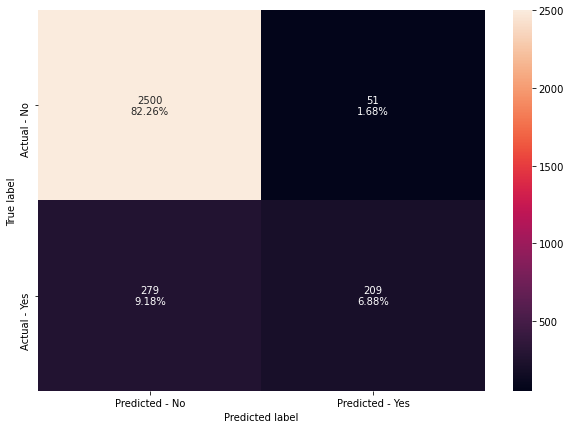

In [16]:
make_confusion_matrix(model,y_test)

In [17]:
model_acc = get_metrics_score(model)

Accuracy on training set :  0.8889672686230248
Accuracy on test set :  0.8914116485686081
Recall on training set :  0.43810359964881473
Recall on test set :  0.42827868852459017
Precision on training set :  0.7724458204334366
Precision on test set :  0.8038461538461539


In [216]:
# SMOTE UP Sampling
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before UpSampling, counts of label '1': 1139
Before UpSampling, counts of label '0': 5949 

After UpSampling, counts of label '1': 5949
After UpSampling, counts of label '0': 5949 

After UpSampling, the shape of train_X: (11898, 21)
After UpSampling, the shape of train_y: (11898,) 



In [217]:
# fit model on upsampled data 

model.fit(X_train_res, y_train_res)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.771964461994077
[[1963  588]
 [ 105  383]]
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      2551
           1       0.39      0.78      0.53       488

    accuracy                           0.77      3039
   macro avg       0.67      0.78      0.69      3039
weighted avg       0.86      0.77      0.80      3039



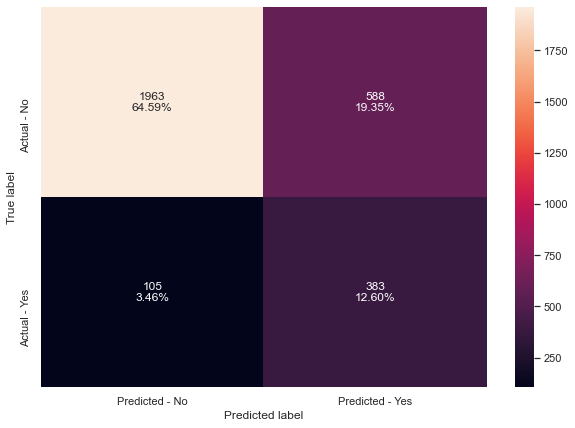

In [218]:
make_confusion_matrix(model,y_test)

In [219]:
model_acc = get_metrics_score(model)

Accuracy on training set :  0.8010722347629797
Accuracy on test set :  0.771964461994077
Recall on training set :  0.7945566286215979
Recall on test set :  0.7848360655737705
Precision on training set :  0.434887073522345
Precision on test set :  0.3944387229660144


In [220]:
df['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [221]:
# Downsampling - 

non_attr_indices = df[df['Attrition_Flag'] == 0].index   # Get the record numbers of non attrition records
no_attr = len(df[df['Attrition_Flag'] == 0])             # how many non-attrition records
print(no_attr)

attr_indices = df[df['Attrition_Flag'] == 1].index   # Get the record numbers of non attrition records
attr = len(df[df['Attrition_Flag'] == 1])            # how many non-attrition records
print(attr)


8500
1627


In [222]:
random_indices = np.random.choice( non_attr_indices, no_attr - 200 , replace=False)    #Randomly pick up 200 non-attr indices

In [223]:
down_sample_indices = np.concatenate([attr_indices,random_indices])  # combine the 200 non-attr indices with diab indices

In [224]:
attr_df_down_sample = df.loc[down_sample_indices]  # Extract all those records for attrition and non-attrition to create new set
attr_df_down_sample.shape
attr_df_down_sample.groupby(["Attrition_Flag"]).count()  # look at the class distribution after downsample

Customer_Age  Gender  Dependent_count  Education_Level  \
Attrition_Flag                                                           
0                       8300    8300             8300             8300   
1                       1627    1627             1627             1627   

                Marital_Status  Income_Category  Card_Category  \
Attrition_Flag                                                   
0                         8300             8300           8300   
1                         1627             1627           1627   

                Months_on_book  Total_Relationship_Count  \
Attrition_Flag                                             
0                         8300                      8300   
1                         1627                      1627   

                Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
Attrition_Flag                                                                
0                                 8300                   8300          8300   
1                                 1627                   1627          1627   

                Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
Attrition_Flag                                                               
0                              8300             8300                  8300   
1                              1627             1627                  1627   

                Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
Attrition_Flag                                                         
0                          8300            8300                 8300   
1                          1627            1627                 1627   

                Avg_Utilization_Ratio  
Attrition_Flag                         
0                                8300  
1                                1627

In [225]:
# Separating target variable and other variables
X1 = attr_df_down_sample.drop(columns="Attrition_Flag")
Y1 = attr_df_down_sample["Attrition_Flag"]
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=test_size, random_state=seed)
type(X_train1)

pandas.core.frame.DataFrame

In [226]:
print('After DownSampling, the shape of X_train: {}'.format(X_train1.shape))
print('After DownSampling, the shape of X_test: {} \n'.format(X_test1.shape))

After DownSampling, the shape of X_train: (6948, 19)
After DownSampling, the shape of X_test: (2979, 19) 



In [227]:
X_train1=pd.get_dummies(X_train1,drop_first=True)
X_test1=pd.get_dummies(X_test1,drop_first=True)
print(X_train1.shape, X_test1.shape)

(6948, 21) (2979, 21)


In [228]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train1, y_train1)
y_predict = model.predict(X_test1)
model_score = model.score(X_test1, y_test1)
print(model_score)
print(metrics.confusion_matrix(y_test1, y_predict))
print(metrics.classification_report(y_test1, y_predict))

0.877139979859013
[[2416  102]
 [ 264  197]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2518
           1       0.66      0.43      0.52       461

    accuracy                           0.88      2979
   macro avg       0.78      0.69      0.72      2979
weighted avg       0.86      0.88      0.87      2979



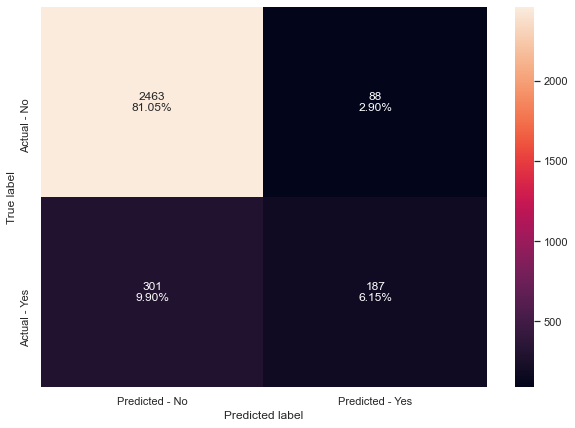

In [230]:
make_confusion_matrix(model,y_test)

In [231]:
model_acc = get_metrics_score(model)

Accuracy on training set :  0.8678047404063205
Accuracy on test set :  0.8719973675551168
Recall on training set :  0.38366988586479367
Recall on test set :  0.3831967213114754
Precision on training set :  0.6502976190476191
Precision on test set :  0.68


# Model building - Bagging and Boosting - (8 Marks)
    - Build Decision tree, 
    random forest, bagging classifier models 
    - Build Xgboost, AdaBoost, 
    and gradient boosting models

In [21]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 58.8252569750367
RF: 80.15689002241287
GBM: 83.49292835613262
ADB: 83.58257979751139
XGB: 86.0387201483886
DTREE: 77.69727181389598


Hyperparameter tuning using grid search - (8 Marks)
    - Tune all the models using grid search 
    - Use pipelines in hyperparameter tuning

In [22]:
%%time 
# Ada boost, Grid CV Search
# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 100} 
Score: 0.8726833603833372
CPU times: user 7min 13s, sys: 2.89 s, total: 7min 16s
Wall time: 7min 17s


In [23]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=100,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=100,
                                    random_state=1))])

Accuracy on training set :  0.996755079006772
Accuracy on test set :  0.9726883843369529
Recall on training set :  0.9894644424934153
Recall on test set :  0.9077868852459017
Precision on training set :  0.9903339191564148
Precision on test set :  0.920997920997921


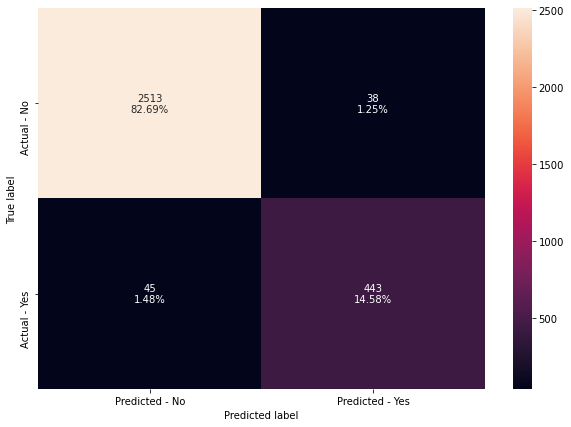

In [24]:
# Calculating different metrics
get_metrics_score(abc_tuned1)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

# Observation
- The tuned adaboost model is not overfitting the training data
- The test recall is 90% i.e. the model is  good at identifying potential customers who would leave credit card service.

# Hyperparameter tuning using random search - (8 Marks)
   - Tune all the models using ramdonized search 
   - Use pipelines in hyperparameter tuning

In [25]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 100, 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.8726833603833372:
CPU times: user 2min 29s, sys: 921 ms, total: 2min 30s
Wall time: 2min 31s


In [26]:
# Creating new pipeline with best parameters
abc_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=100,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=100,
                                    random_state=1))])

Accuracy on training set :  0.996755079006772
Accuracy on test set :  0.9726883843369529
Recall on training set :  0.9894644424934153
Recall on test set :  0.9077868852459017
Precision on training set :  0.9903339191564148
Precision on test set :  0.920997920997921


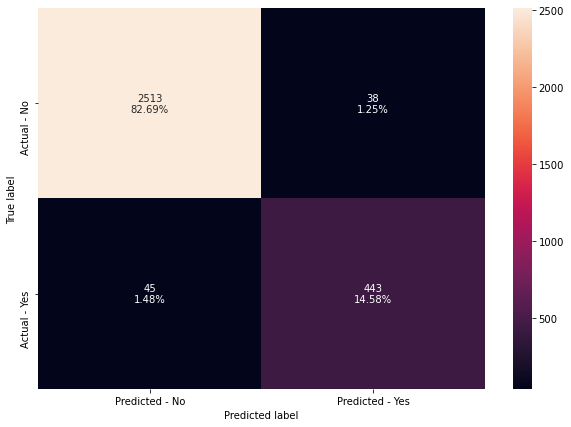

In [27]:
# Calculating different metrics
get_metrics_score(abc_tuned1)

# Creating confusion matrix
make_confusion_matrix(abc_tuned2, y_test)

# XG Boost
 Grid search cv

In [38]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

# Grid of parameters to choose from
## add from
#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
           'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 5, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.7} with CV score=0.9517157431022489:
CPU times: user 10h 10min 51s, sys: 35min 9s, total: 10h 46min
Wall time: 1h 56min 26s


In [29]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=0.9,
        learning_rate=0.01,
        gamma=5,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9209932279909706
Accuracy on test set :  0.8993089832181639
Recall on training set :  0.9850746268656716
Recall on test set :  0.9262295081967213
Precision on training set :  0.6738738738738739
Precision on test set :  0.6260387811634349


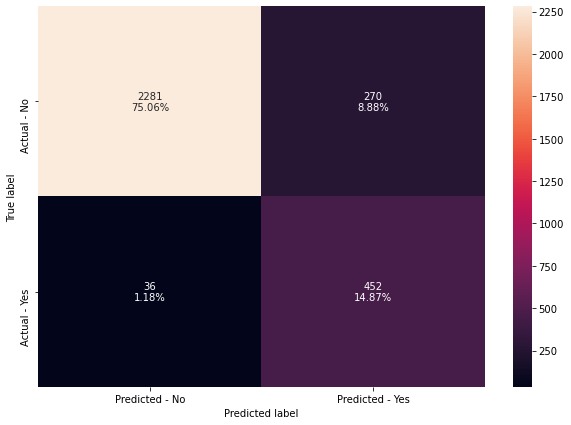

In [30]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

# Random Search  - XGBoost

In [31]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators = 50))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 1, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 2, 'xgbclassifier__n_estimators': 250, 'xgbclassifier__max_depth': 1, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__gamma': 1} with CV score=0.9605108586444084:
CPU times: user 15min 45s, sys: 56.6 s, total: 16min 42s
Wall time: 3min 7s


In [39]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=250,
                scale_pos_weight=10,
                gamma=1,
                subsample=1,
                learning_rate= 0.05,
                eval_metric='logloss', max_depth = 1, reg_lambda = 2
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=1, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=1,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=250,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=2, scale_pos_weight=10,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.795852144469526
Accuracy on test set :  0.782494241526818
Recall on training set :  0.9683933274802459
Recall on test set :  0.9631147540983607
Precision on training set :  0.43874303898170247
Precision on test set :  0.4222821203953279


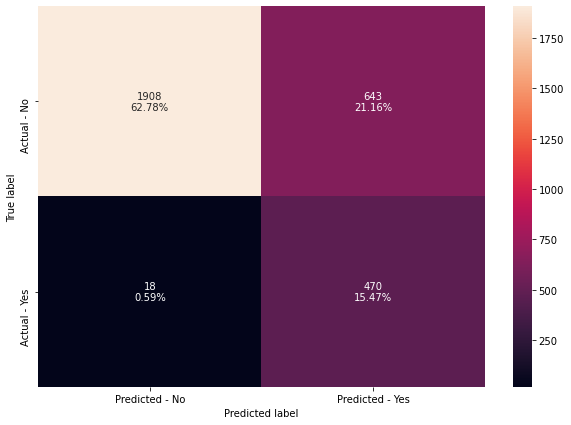

In [40]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

Model Performances - (5 Marks)
- Compare the model performance of all the models - Comment on the time taken by the grid and randomized search in optimization

In [34]:
# defining list of models
models = [abc_tuned1, abc_tuned2, xgb_tuned1, xgb_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [41]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Decision Tree with GridSearchCV",
            "Decision Tree with RandomizedSearchCV",
            "XGBoost with GridSearchCV",
            "XGBoost with RandomizedSearchCV",
    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
3        XGBoost with RandomizedSearchCV        0.760299       0.751234   
2              XGBoost with GridSearchCV        0.920993       0.899309   
0        Decision Tree with GridSearchCV        0.996755       0.972688   
1  Decision Tree with RandomizedSearchCV        0.996755       0.972688   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
3      0.967515     0.961066         0.398698        0.388889  
2      0.985075     0.926230         0.673874        0.626039  
0      0.989464     0.907787         0.990334        0.920998  
1      0.989464     0.907787         0.990334        0.920998

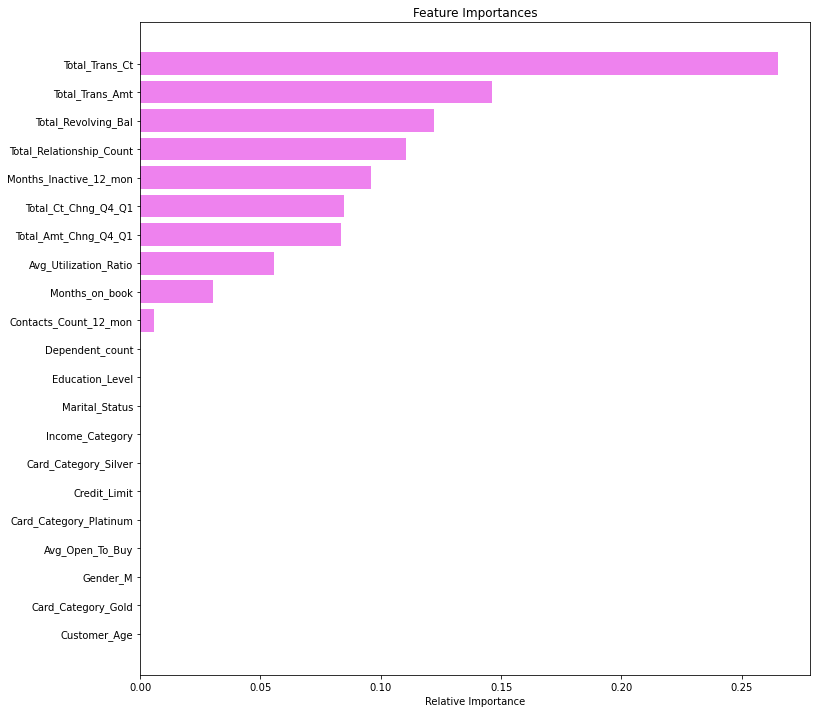

In [36]:
feature_names = X_train.columns
importances = xgb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Insights
XGBoost with RandomizedSearchCV, performed well compared to other models. The recall score is good in this model and with ransomized search cv.

Actionable Insights & Recommendations - (5 Marks)
- Business recommendations and insights

1. Bank should target the customers has more transaction count in 12 months. As their transaction increases they are more likely to stop the service. Based on the transactions bank can target those customer and provide some money back which will help them to retain the customer.
2. Total transaction amount and revolving balance affects the churn, bank can focus on those cusomter and provide some offers.
3. Customer who has more productes (no of products held by the customer) should be targeted and launch new products to retain them and offer them added benefits.
4. Bank also should focus on inactive customer (not active for months) and provide them offers encourage them to use card. 
5. Customer who has Extended period of relationship with bank most likely to stay, so bank should focus on the cusotmer relationship
6. Raltionship and transaction count are the most affected features, bank should target those users and provide added benefits to increase the transaction, keep them active and encourage them to buy new products.


Notebook - Overall quality - (4 Marks)
- Structure and flow - Well commented code